In [2]:
import pandas as pd
import cloudpickle
import numpy as np

In [3]:
df = cloudpickle.load(open("pickles/cleaned_forum_data.pkl", "rb" ) )

totest=df.shape[0]

asktxt = df['askertxt'].as_matrix()[:totest]
doctxt = df['doctortxt'].as_matrix()[:totest]

diag = cloudpickle.load(open("pickles/doctortext_labels.pkl", "rb" ) )[:totest,:]
antidiag = cloudpickle.load(open("pickles/askertext_labels.pkl", "rb" ) )[:totest,:]
y_yes=np.asarray(diag.todense()).squeeze() 
y_no=np.asarray(antidiag.todense()).squeeze() 
y = y_yes*(1-y_no)
# y=y[:,y.sum(axis=0)>50]

In [4]:
y.shape

(63846, 72)

In [5]:
import cloudpickle
vec =cloudpickle.load(open("pickles/forum_vecrepresent.pkl", "rb" ) )
disease_db = cloudpickle.load(open("pickles/disease_db.pkl", "rb" ) )

In [6]:
dropi = [i for i,d in enumerate(disease_db) if d['name']=='pregnancy'][0]
vec_keep = ((y[:,dropi]==0) | (np.random.random((y.shape[0],))<0.05)) & (y.sum(axis=1)>0)
X = vec[vec_keep,:]
y = y[vec_keep,:]

In [7]:
y.shape

(10271, 72)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier


clf = %time OneVsRestClassifier(LogisticRegression())
# clf =%time OneVsRestClassifier(ExtraTreesClassifier(n_estimators=10,method='logloss'))
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

clf.fit(xtrain, ytrain)
print accuracy_score(clf.predict(xtest), ytest)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 64.8 µs
0.0330996884735


In [14]:
from sklearn.metrics import roc_curve, auc

n_classes = y.shape[1]

yscore = clf.predict_proba(xtest)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], yscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), yscore.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

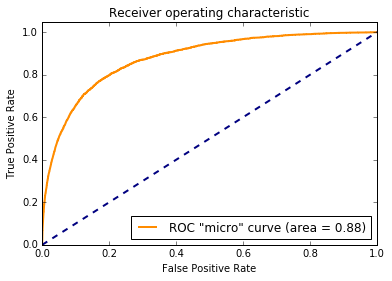

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC "micro" curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
with open("pickles/forum_classifier.pkl", 'wb') as handle:
    cloudpickle.dump(clf, handle)
with open("pickles/forum_db.pkl", 'wb') as handle:
    cloudpickle.dump(df, handle)

In [6]:
clf =cloudpickle.load(open("pickles/forum_classifier.pkl", "rb" ) )

In [23]:
y_guess=%time clf.fit(X, y).predict_proba(X)

CPU times: user 6min 5s, sys: 136 ms, total: 6min 5s
Wall time: 6min 6s


14508.0


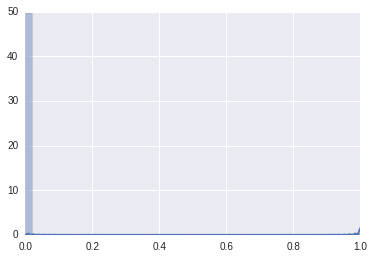

In [24]:
import seaborn as sns
sns.distplot(y_guess[:,34])


In [ ]:
[i for i,d in enumerate(disease_db) if d['name']=='chlamydia'][0]

In [ ]:
vec_find = (y[:,34]==1)
df.loc[vec_find,'askertxt'][469]

In [ ]:
df.loc[vec_find,'doctortxt'][469]

In [10]:
y.shape[0]*y.shape[1]

3620016

In [21]:
yscore[1000,:].sum()

0.29121588959473471